In [2]:
import pandas as pd
import numpy as np
from numpy import array
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [3]:
df=pd.read_csv('/content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [4]:
df.shape

(10468, 7)

In [5]:
df1=df.reset_index()['Close'];df1

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10463    131.880005
10464    132.759995
10465    135.429993
10466    130.059998
10467    131.559998
Name: Close, Length: 10468, dtype: float64

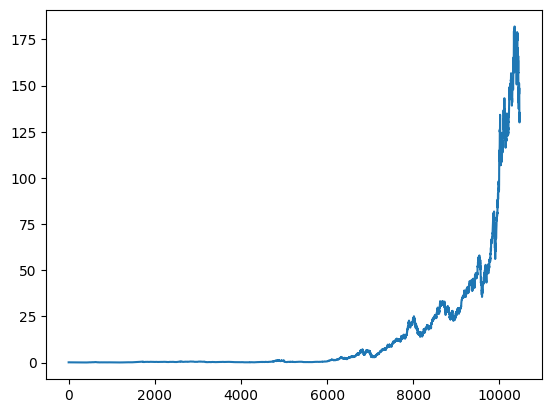

In [6]:
plt.plot(df1);plt.show()

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1));df1

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [8]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
print(training_size,test_size)

6804 3664


In [9]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
print(X_train.shape), print(y_train.shape),print(X_test.shape), print(ytest.shape)

(6703, 100)
(6703,)
(3563, 100)
(3563,)


(None, None, None, None)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
print(X_train.shape), print(X_test.shape)

(6703, 100, 1)
(3563, 100, 1)


(None, None)

In [14]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # 100 hidden units in the first layer
model.add(LSTM(100, return_sequences=True))  # 100 hidden units in the second layer
model.add(LSTM(100))  # 100 hidden units in the third layer
model.add(Dense(1))  # Single output unit
model.compile(loss='mse', optimizer='adam')

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=0)


In [15]:
from keras.callbacks import EarlyStopping

In [16]:

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

X_train shape: (6703, 100, 1)
y_train shape: (6703,)
Model input shape: (None, 100, 1)
Model output shape: (None, 1)


In [17]:
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of inputs: {model.input_shape[1]}")

Number of features: 100
Number of inputs: 100


In [19]:
# Import the EarlyStopping class
from keras.callbacks import EarlyStopping

# ... (load and preprocess data as before)
# ... (define your LSTM model as before)

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=1024,  # Or try smaller sizes like 32 or 16 if needed
    validation_data=(X_test, ytest),
    callbacks=[early_stopping],
    verbose=1
)

# ... (evaluate and predict as before)

Epoch 1/25
7/7 [==============================] - 37s 5s/step - loss: 6.4830e-05 - val_loss: 0.1019
Epoch 2/25
7/7 [==============================] - 36s 5s/step - loss: 4.1048e-05 - val_loss: 0.0922
Epoch 3/25
7/7 [==============================] - 36s 5s/step - loss: 3.0268e-05 - val_loss: 0.0929
Epoch 4/25
7/7 [==============================] - 37s 5s/step - loss: 2.4461e-05 - val_loss: 0.0844
Epoch 5/25
7/7 [==============================] - 35s 5s/step - loss: 2.0777e-05 - val_loss: 0.0773
Epoch 6/25
7/7 [==============================] - 37s 5s/step - loss: 1.7398e-05 - val_loss: 0.0626
Epoch 7/25
7/7 [==============================] - 35s 5s/step - loss: 1.2858e-05 - val_loss: 0.0428
Epoch 8/25
7/7 [==============================] - 41s 6s/step - loss: 6.3222e-06 - val_loss: 0.0147
Epoch 9/25
7/7 [==============================] - 36s 5s/step - loss: 1.2458e-06 - val_loss: 0.0036
Epoch 10/25
7/7 [==============================] - 39s 6s/step - loss: 1.2207e-06 - val_loss: 0.0066

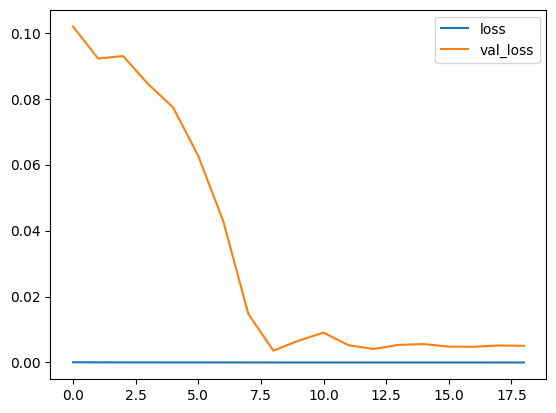

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [21]:
train_predict=model.predict(X_train) #prediction
test_predict=model.predict(X_test)

112/112 [==============================] - 10s 89ms/step


In [22]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

1.2577260494072056
55.65821837678384


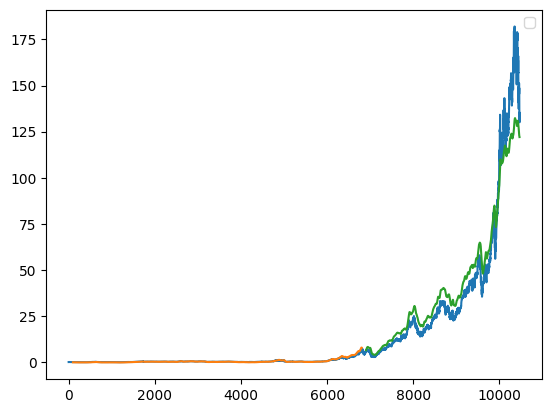

In [24]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

In [25]:
x_input=test_data[483:].reshape(1,-1) #len(test_data)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

Train RMSE: 252062970018.44342
Test RMSE: 11167501702462.602


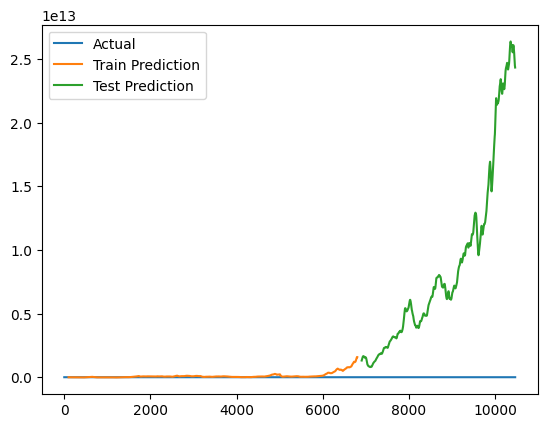

In [39]:
# ... (previous code) ...

# Invert the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
print(f"Train RMSE: {np.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(scaler.inverse_transform(ytest.reshape(-1, 1)), test_predict))}")

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[
    len(train_predict) + (look_back * 2) + 1 : len(df1) - 1, :
] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label="Actual")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.legend()
plt.show()

# ... (rest of the code) ...

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

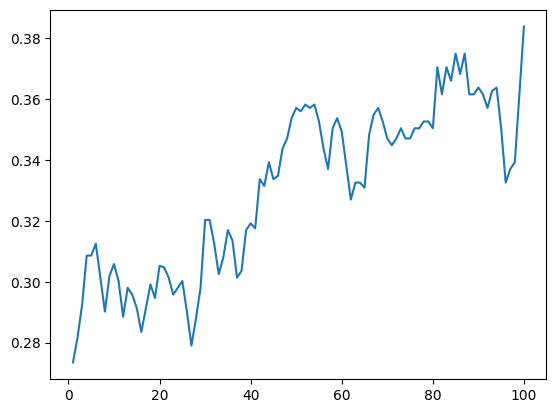

In [34]:
plt.plot(day_new, scaler.inverse_transform(df1[1564:1664]))

In [35]:
day_new = np.arange(1, len(df1[1564:]) + 1)

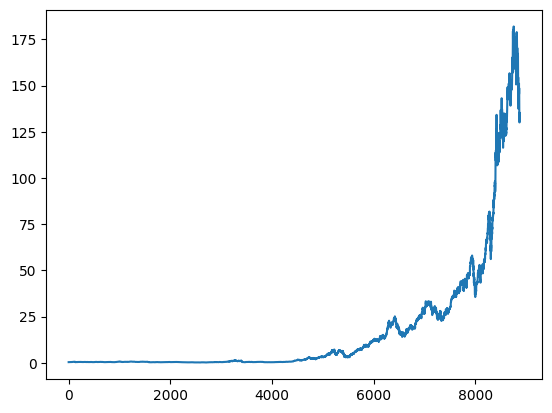

In [38]:
df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3[1600:])

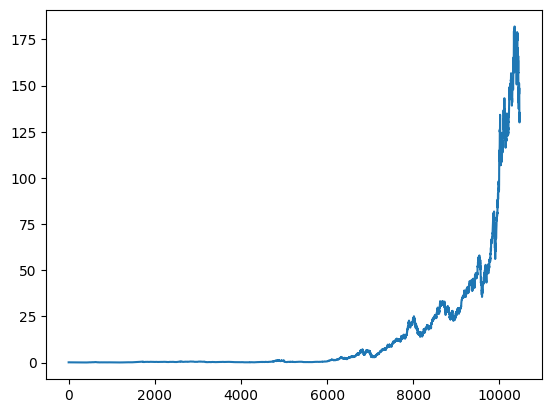

In [37]:
plt.plot(df3)